## Life Expectancy

- different years
- different regions
- different countries

In [1]:
import pandas as pd
from plotnine import *

In [2]:
df = pd.read_csv("./life_expectancy.csv")
df.columns

Index(['Entity', 'Code', 'Year', 'LifeExpectancy'], dtype='object')

In [3]:
df = df.rename(columns={"Entity" : "Ent",
                        "LifeExpectancy" : "LE"})


In [4]:
df["Ent"].unique()

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'American Samoa',
       'Americas', 'Andorra', 'Angola', 'Anguilla', 'Antigua and Barbuda',
       'Argentina', 'Armenia', 'Aruba', 'Asia', 'Australia', 'Austria',
       'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados',
       'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan',
       'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao',
       'Cyprus', 'Czechia', 'Democratic Republic of Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'East Timor',
       'Ecuador', 'Egypt', 'El Salvador', 'England and Wal

In [5]:
df["LE"].describe()

count    20755.000000
mean        61.617992
std         12.917682
min         11.995100
25%         52.185850
50%         64.060000
75%         71.822250
max         86.542400
Name: LE, dtype: float64

In [6]:
len(df.loc[~df["Code"].isna()]["Code"]
    .unique())

238

In [7]:
(df.loc[~df["Code"].isna()]["Code"]
    .unique())

array(['AFG', 'ALB', 'DZA', 'ASM', 'AND', 'AGO', 'AIA', 'ATG', 'ARG',
       'ARM', 'ABW', 'AUS', 'AUT', 'AZE', 'BHS', 'BHR', 'BGD', 'BRB',
       'BLR', 'BEL', 'BLZ', 'BEN', 'BMU', 'BTN', 'BOL', 'BES', 'BIH',
       'BWA', 'BRA', 'VGB', 'BRN', 'BGR', 'BFA', 'BDI', 'KHM', 'CMR',
       'CAN', 'CPV', 'CYM', 'CAF', 'TCD', 'CHL', 'CHN', 'COL', 'COM',
       'COG', 'COK', 'CRI', 'CIV', 'HRV', 'CUB', 'CUW', 'CYP', 'CZE',
       'COD', 'DNK', 'DJI', 'DMA', 'DOM', 'TLS', 'ECU', 'EGY', 'SLV',
       'GNQ', 'ERI', 'EST', 'SWZ', 'ETH', 'FLK', 'FRO', 'FJI', 'FIN',
       'FRA', 'GUF', 'PYF', 'GAB', 'GMB', 'GEO', 'DEU', 'GHA', 'GIB',
       'GRC', 'GRL', 'GRD', 'GLP', 'GUM', 'GTM', 'GGY', 'GIN', 'GNB',
       'GUY', 'HTI', 'HND', 'HKG', 'HUN', 'ISL', 'IND', 'IDN', 'IRN',
       'IRQ', 'IRL', 'IMN', 'ISR', 'ITA', 'JAM', 'JPN', 'JEY', 'JOR',
       'KAZ', 'KEN', 'KIR', 'OWID_KOS', 'KWT', 'KGZ', 'LAO', 'LVA', 'LBN',
       'LSO', 'LBR', 'LBY', 'LIE', 'LTU', 'LUX', 'MAC', 'MDG', 'MWI',
       'MYS', '

In [8]:
(df.loc[df["Code"].isna()]["Ent"]
    .unique())

array(['Africa', 'Americas', 'Asia', 'England and Wales', 'Europe',
       'High-income countries', 'Land-locked Developing Countries (LLDC)',
       'Latin America and the Caribbean', 'Least developed countries',
       'Less developed regions',
       'Less developed regions, excluding China',
       'Less developed regions, excluding least developed countries',
       'Low-income countries', 'Lower-middle-income countries',
       'Middle-income countries', 'More developed regions',
       'No income group available', 'Northern America',
       'Northern Ireland', 'Oceania', 'Scotland',
       'Small Island Developing States (SIDS)',
       'Upper-middle-income countries'], dtype=object)

The dataset includes 195 independent countries, some disputed territories, and aggregated areas.

In [9]:
with_codes = df.loc[~df["Code"].isna()]
with_codes_2021 = with_codes.loc[df["Year"]==2021]
len(with_codes_2021)

237

In [10]:
with_codes_2021 = with_codes_2021.sort_values("LE",
                                              ascending=False)

In [11]:
with_codes_2021[["LE"]].describe().T

,count,mean,std,min,25%,50%,75%,max
LE,237.0,72.310273,7.50326,52.5254,67.4172,73.2845,78.2107,85.9463


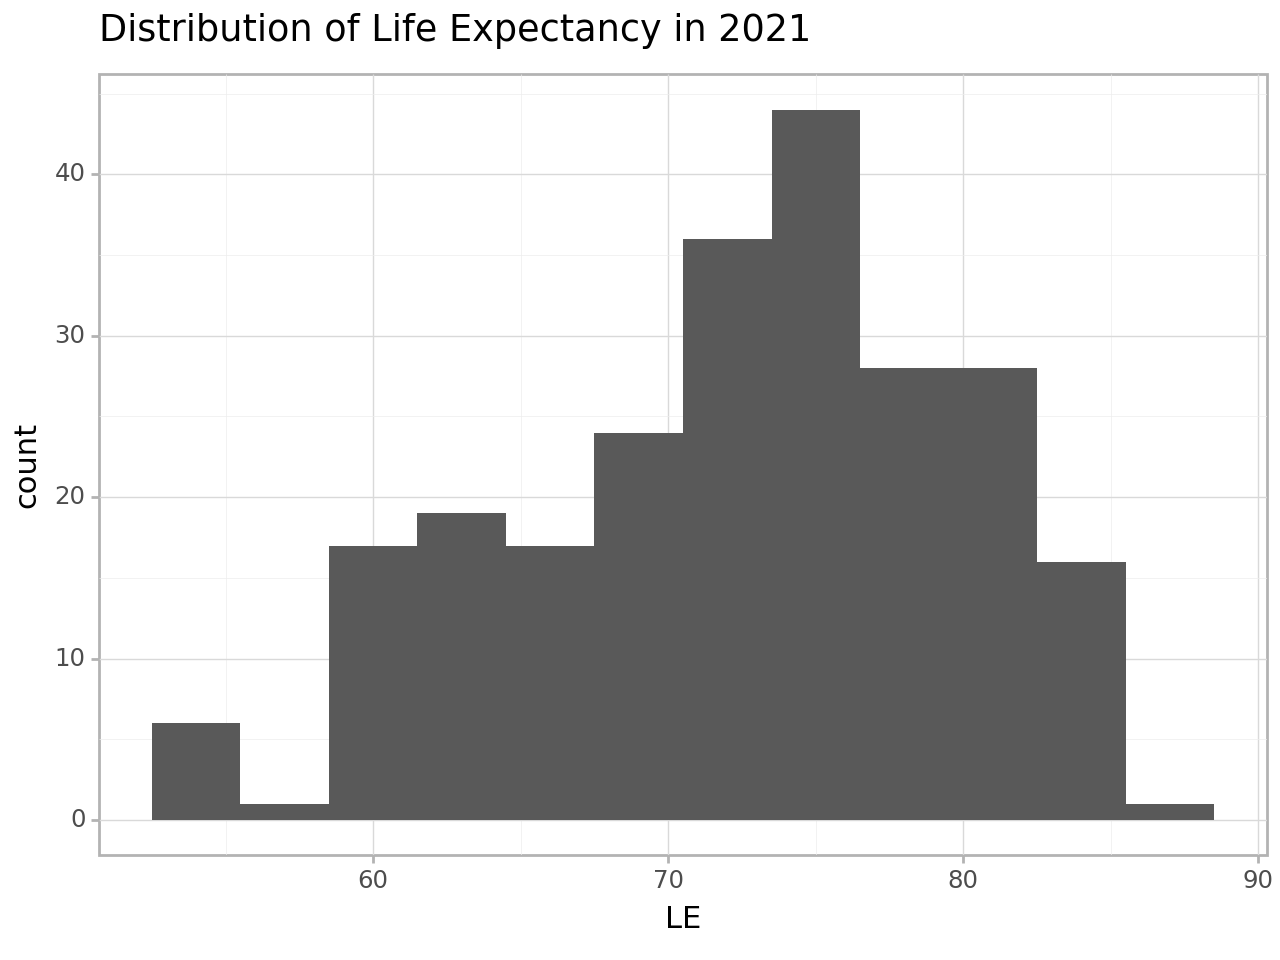

<Figure Size: (640 x 480)>

In [12]:
(ggplot(with_codes_2021, aes(x="LE")) +
 geom_histogram(binwidth = 3) +
 theme_light() +
 labs(title="Distribution of Life Expectancy in 2021"))

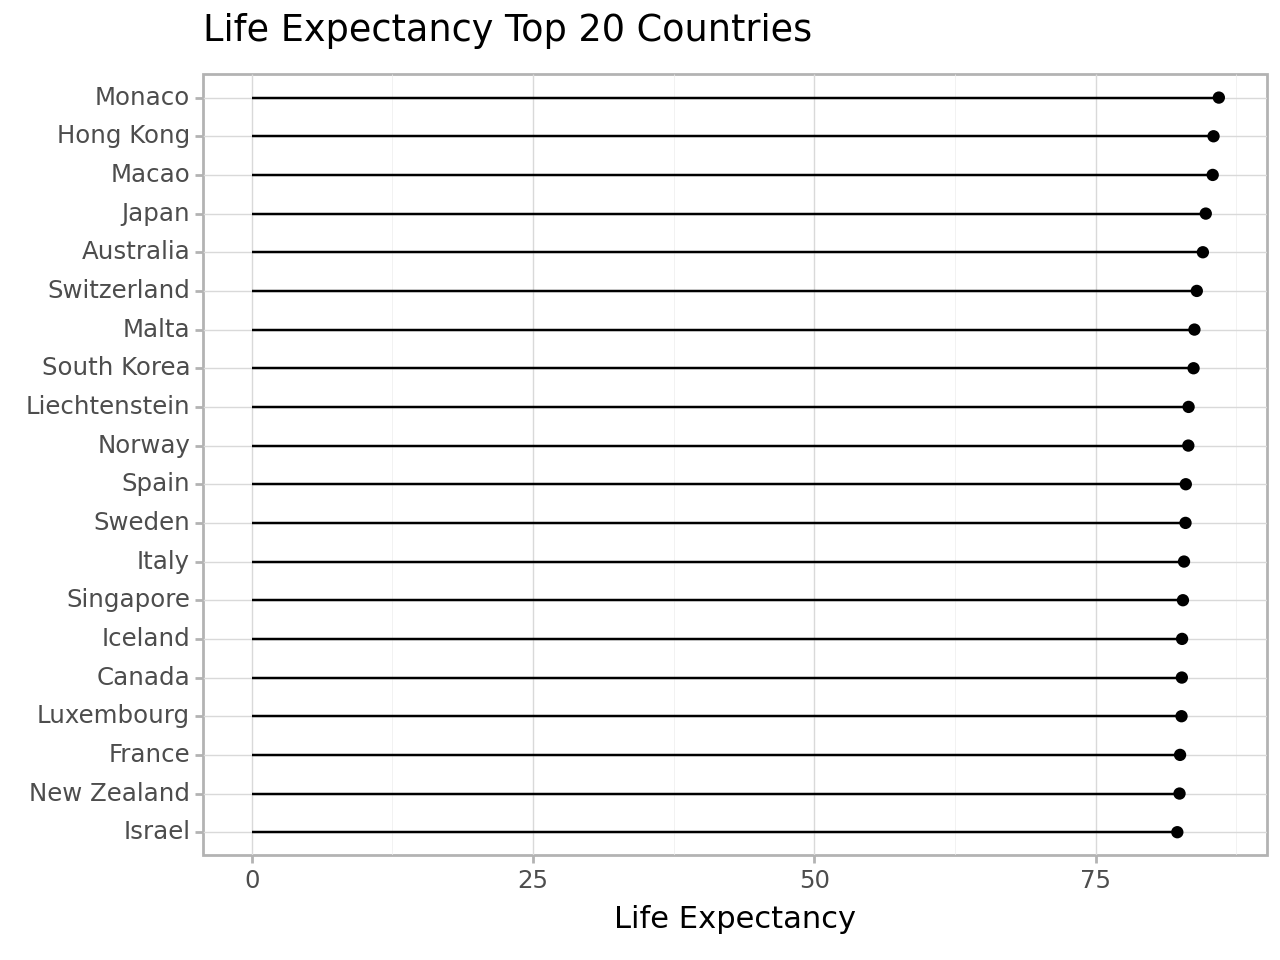

<Figure Size: (640 x 480)>

In [13]:
data = with_codes_2021.iloc[:20]
ctr_list = data["Ent"].tolist()[::-1]

(ggplot(data, aes(x="Ent", y="LE")) +
 geom_point() +
 geom_segment(aes(xend="Ent", yend=0)) +
 scale_x_discrete(limits=ctr_list) +
 coord_flip() +
 theme_light() +
 labs(x="", title="Life Expectancy Top 20 Countries",
      y="Life Expectancy"))

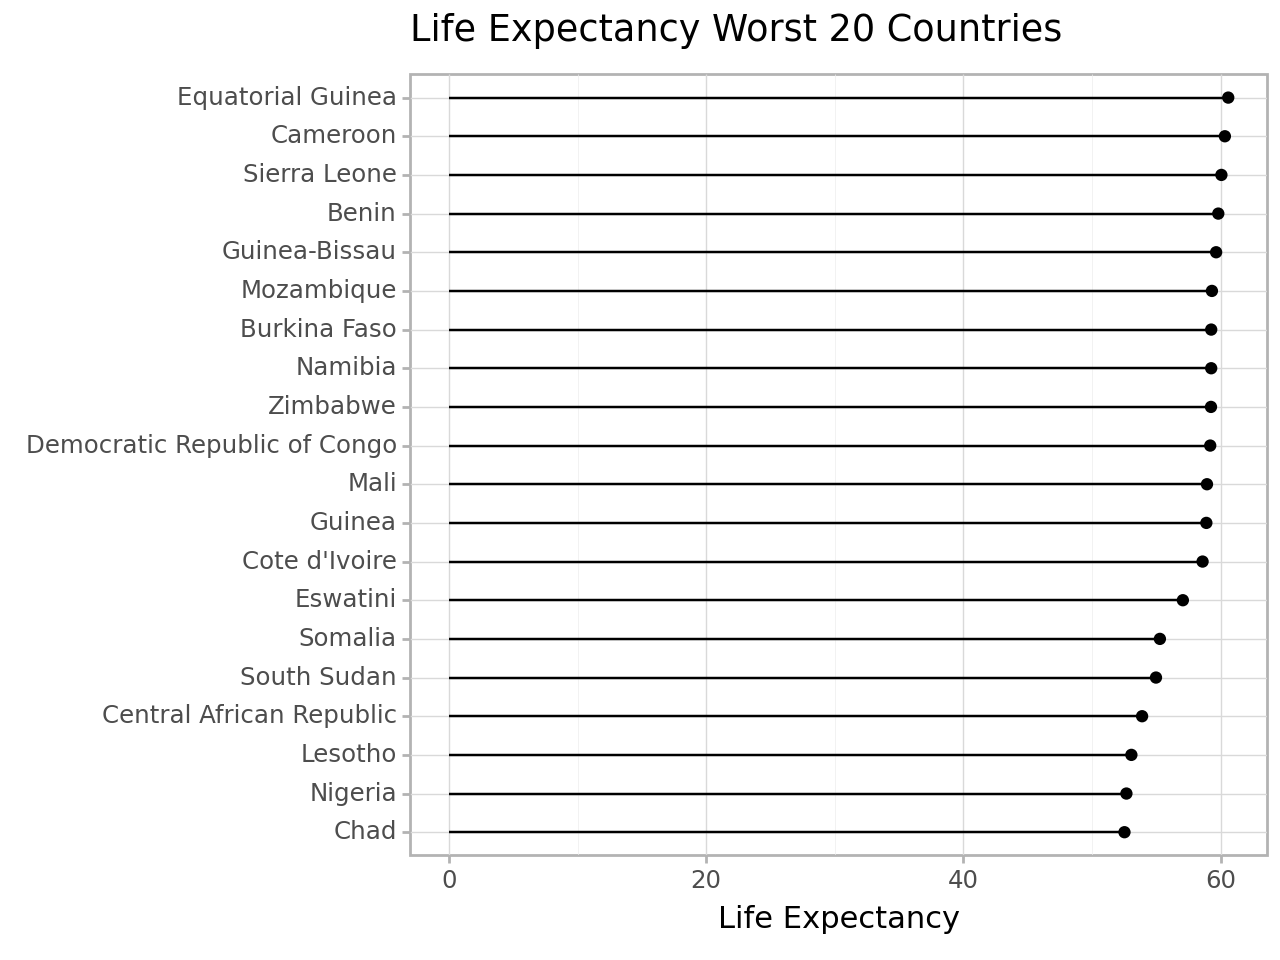

<Figure Size: (640 x 480)>

In [14]:
data = with_codes_2021.iloc[-20:]
ctr_list = data["Ent"].tolist()[::-1]

(ggplot(data, aes(x="Ent", y="LE")) +
 geom_point() +
 geom_segment(aes(xend="Ent", yend=0)) +
 scale_x_discrete(limits=ctr_list) +
 coord_flip() +
 theme_light() +
 labs(x="", title="Life Expectancy Worst 20 Countries",
      y="Life Expectancy"))

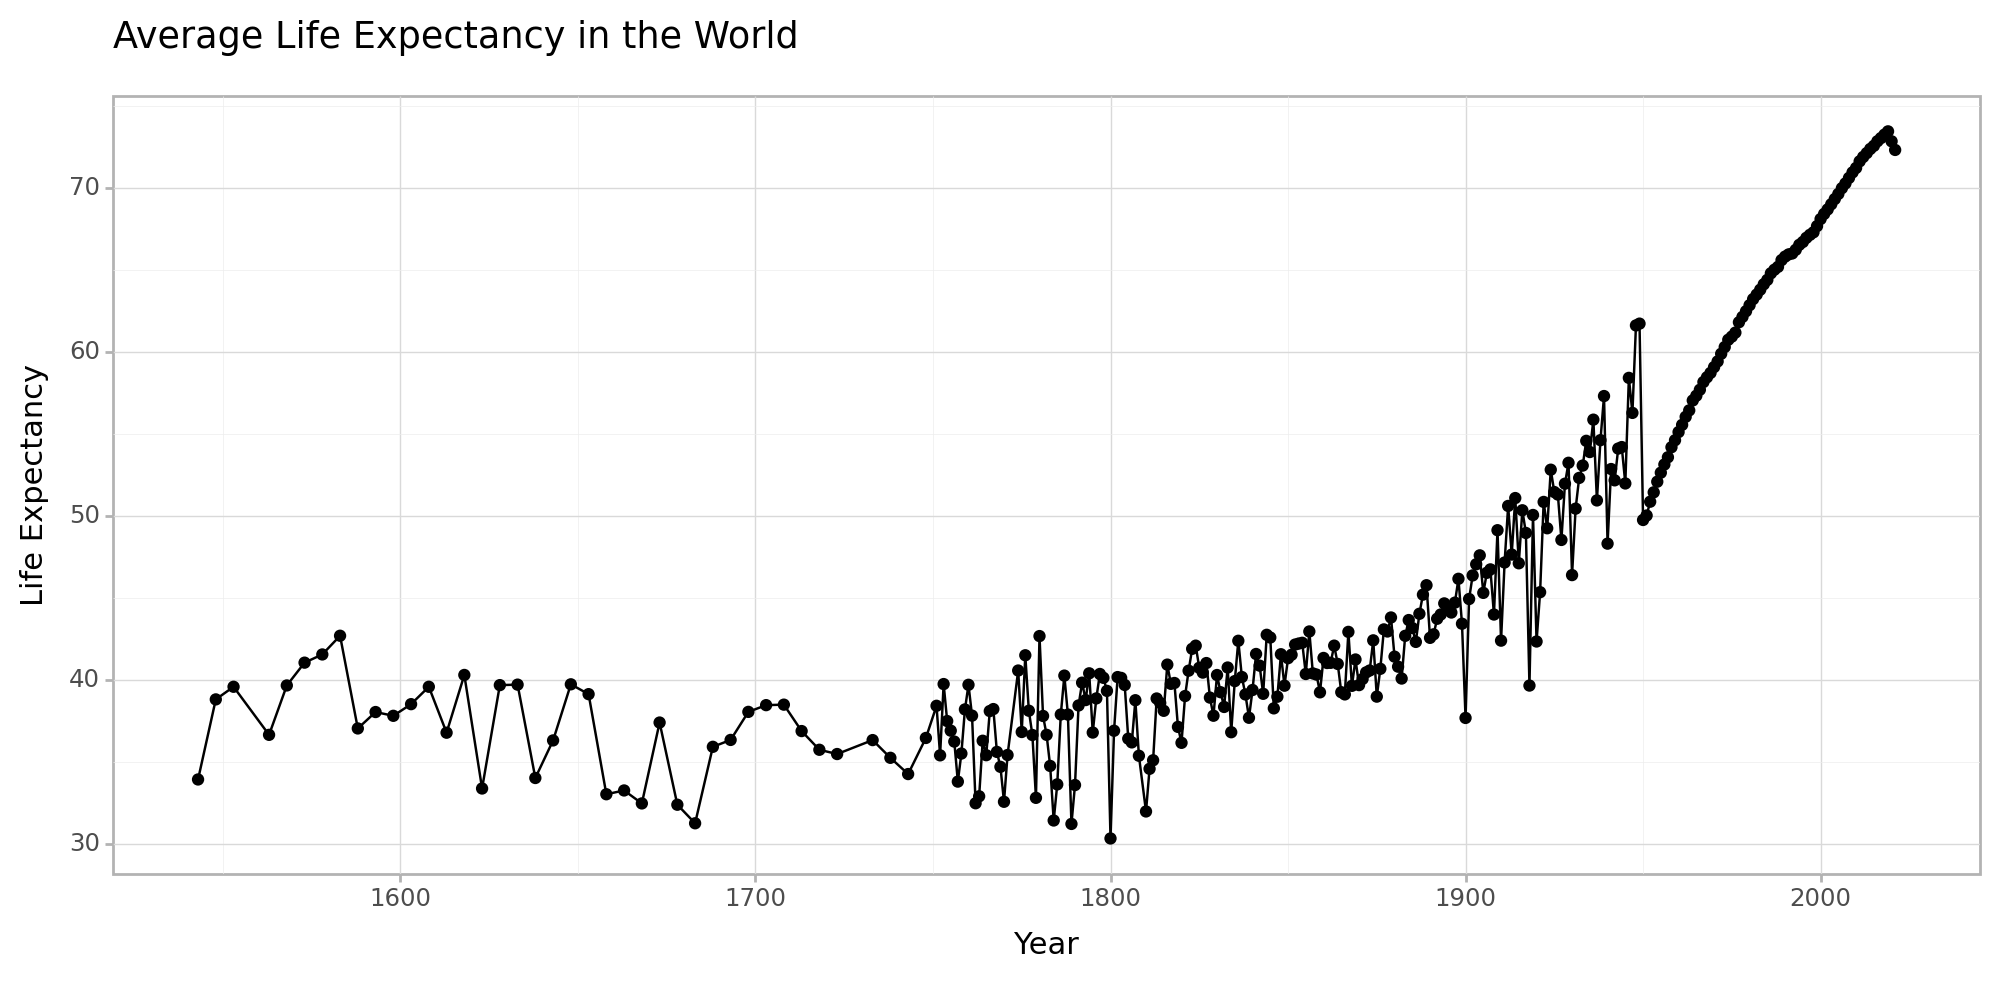

<Figure Size: (1000 x 500)>

In [15]:
# do not use years with only a few contries
le_avg = (with_codes.groupby("Year")
          .agg({"LE" : "mean"})
          .reset_index()
          .query("LE > 30"))

(ggplot(le_avg, aes(x="Year", y="LE")) +
 geom_point() +
 geom_line() +
 theme_light() +
 theme(figure_size=(10,5)) +
 labs(y="Life Expectancy",
      title="Average Life Expectancy in the World"))

The above graphs show clear difference between data before 1950 and after 1950.
Since 1950, 237 countries have been included in the average calculation. However, Before 1950, the maximum number of countries in the calculation was 43, and data was not collected as frequent.
Overall, the average life expectancy is increasing.

In [16]:
# by major regions
regions = ("Asia",
           "Oceania", 
           "Europe", "Americas", "Africa", "World")

large_areas = (df.loc[df["Ent"].isin(regions)]
               .query("Year >= 1950"))


In [17]:
large_areas.columns

Index(['Ent', 'Code', 'Year', 'LE'], dtype='object')

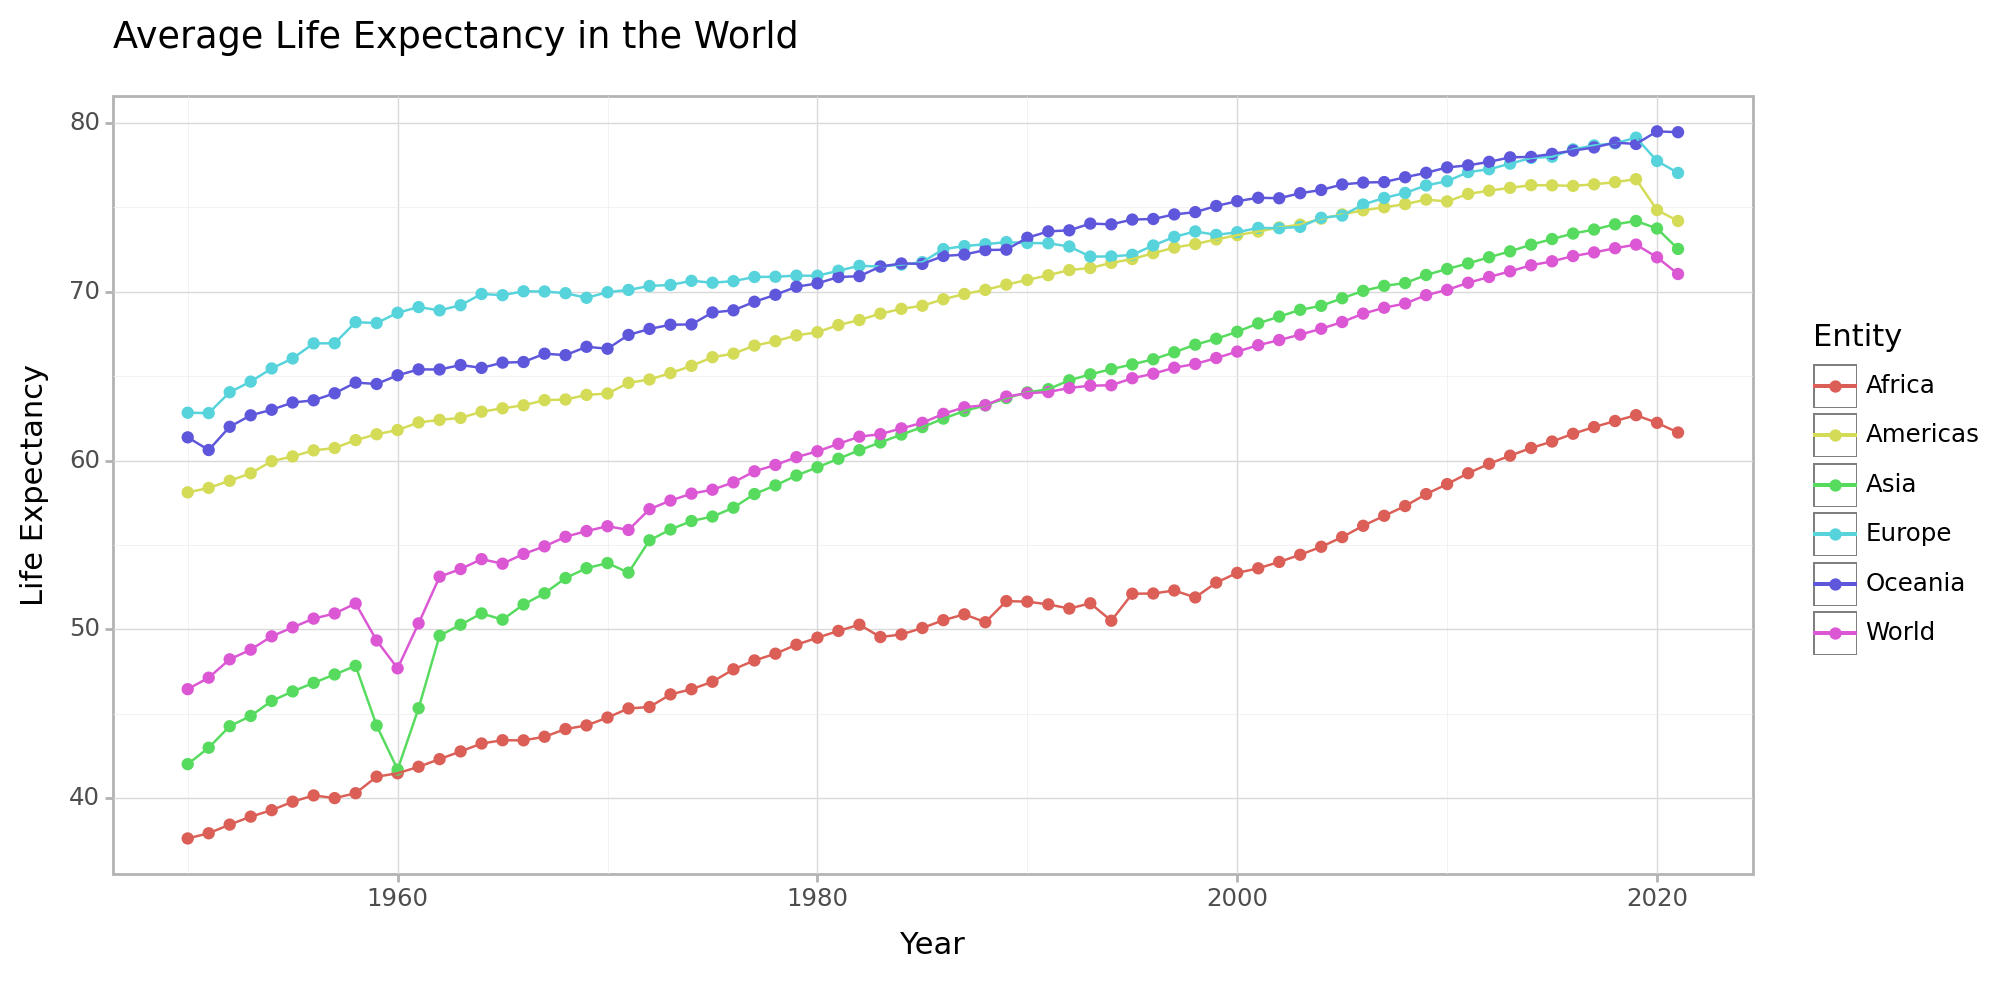

<Figure Size: (1000 x 500)>

In [18]:
(ggplot(large_areas, aes(x="Year", y="LE", color="Ent")) +
 geom_point() +
 geom_line() +
 theme_light() +
 theme(figure_size=(10,5)) +
 guides(color=guide_legend(title="Entity")) +
 labs(y="Life Expectancy",
      title="Average Life Expectancy in the World"))

## Life Expectancy (Female and Male)

Life expectancy difference (f-m) - Type: period - Sex: both - Age: 0

In [19]:
df = pd.read_csv("life_expectancy_female_male.csv")
df.columns

Index(['Entity', 'Code', 'Year', 'LifeExpectancyDiffFM'], dtype='object')

In [20]:
df = df.rename(columns={"LifeExpectancyDiffFM" : "LEDFM",
                        "Entity" : "Ent"})

In [21]:
df["LEDFM"].describe()

count    19922.000000
mean         4.824807
std          2.384928
min         -9.875298
25%          3.227148
50%          4.595249
75%          6.215748
max         29.545800
Name: LEDFM, dtype: float64

In [25]:
df.loc[df["LEDFM"] <= 0].sort_values("LEDFM")

,Ent,Code,Year,LEDFM
2368,British Virgin Islands,VGB,1950,-9.875298
2370,British Virgin Islands,VGB,1952,-9.494701
2369,British Virgin Islands,VGB,1951,-9.157997
2371,British Virgin Islands,VGB,1953,-8.387501
2372,British Virgin Islands,VGB,1954,-6.485203
...,...,...,...,...
8426,Italy,ITA,1884,-0.009998
8425,Italy,ITA,1883,-0.009998
12879,Niger,NER,1984,-0.000896
8433,Italy,ITA,1891,0.000000


In [31]:
(df["Year"].value_counts()
 .sort_index(ascending=False)
 .reset_index().query("count > 50").T)

,0,1,2,3,4,5,6,7,8,9,...,62,63,64,65,66,67,68,69,70,71
Year,2021,2020,2019,2018,2017,2016,2015,2014,2013,2012,...,1959,1958,1957,1956,1955,1954,1953,1952,1951,1950
count,256,256,256,256,256,256,256,256,256,256,...,256,256,256,256,256,256,256,256,256,256


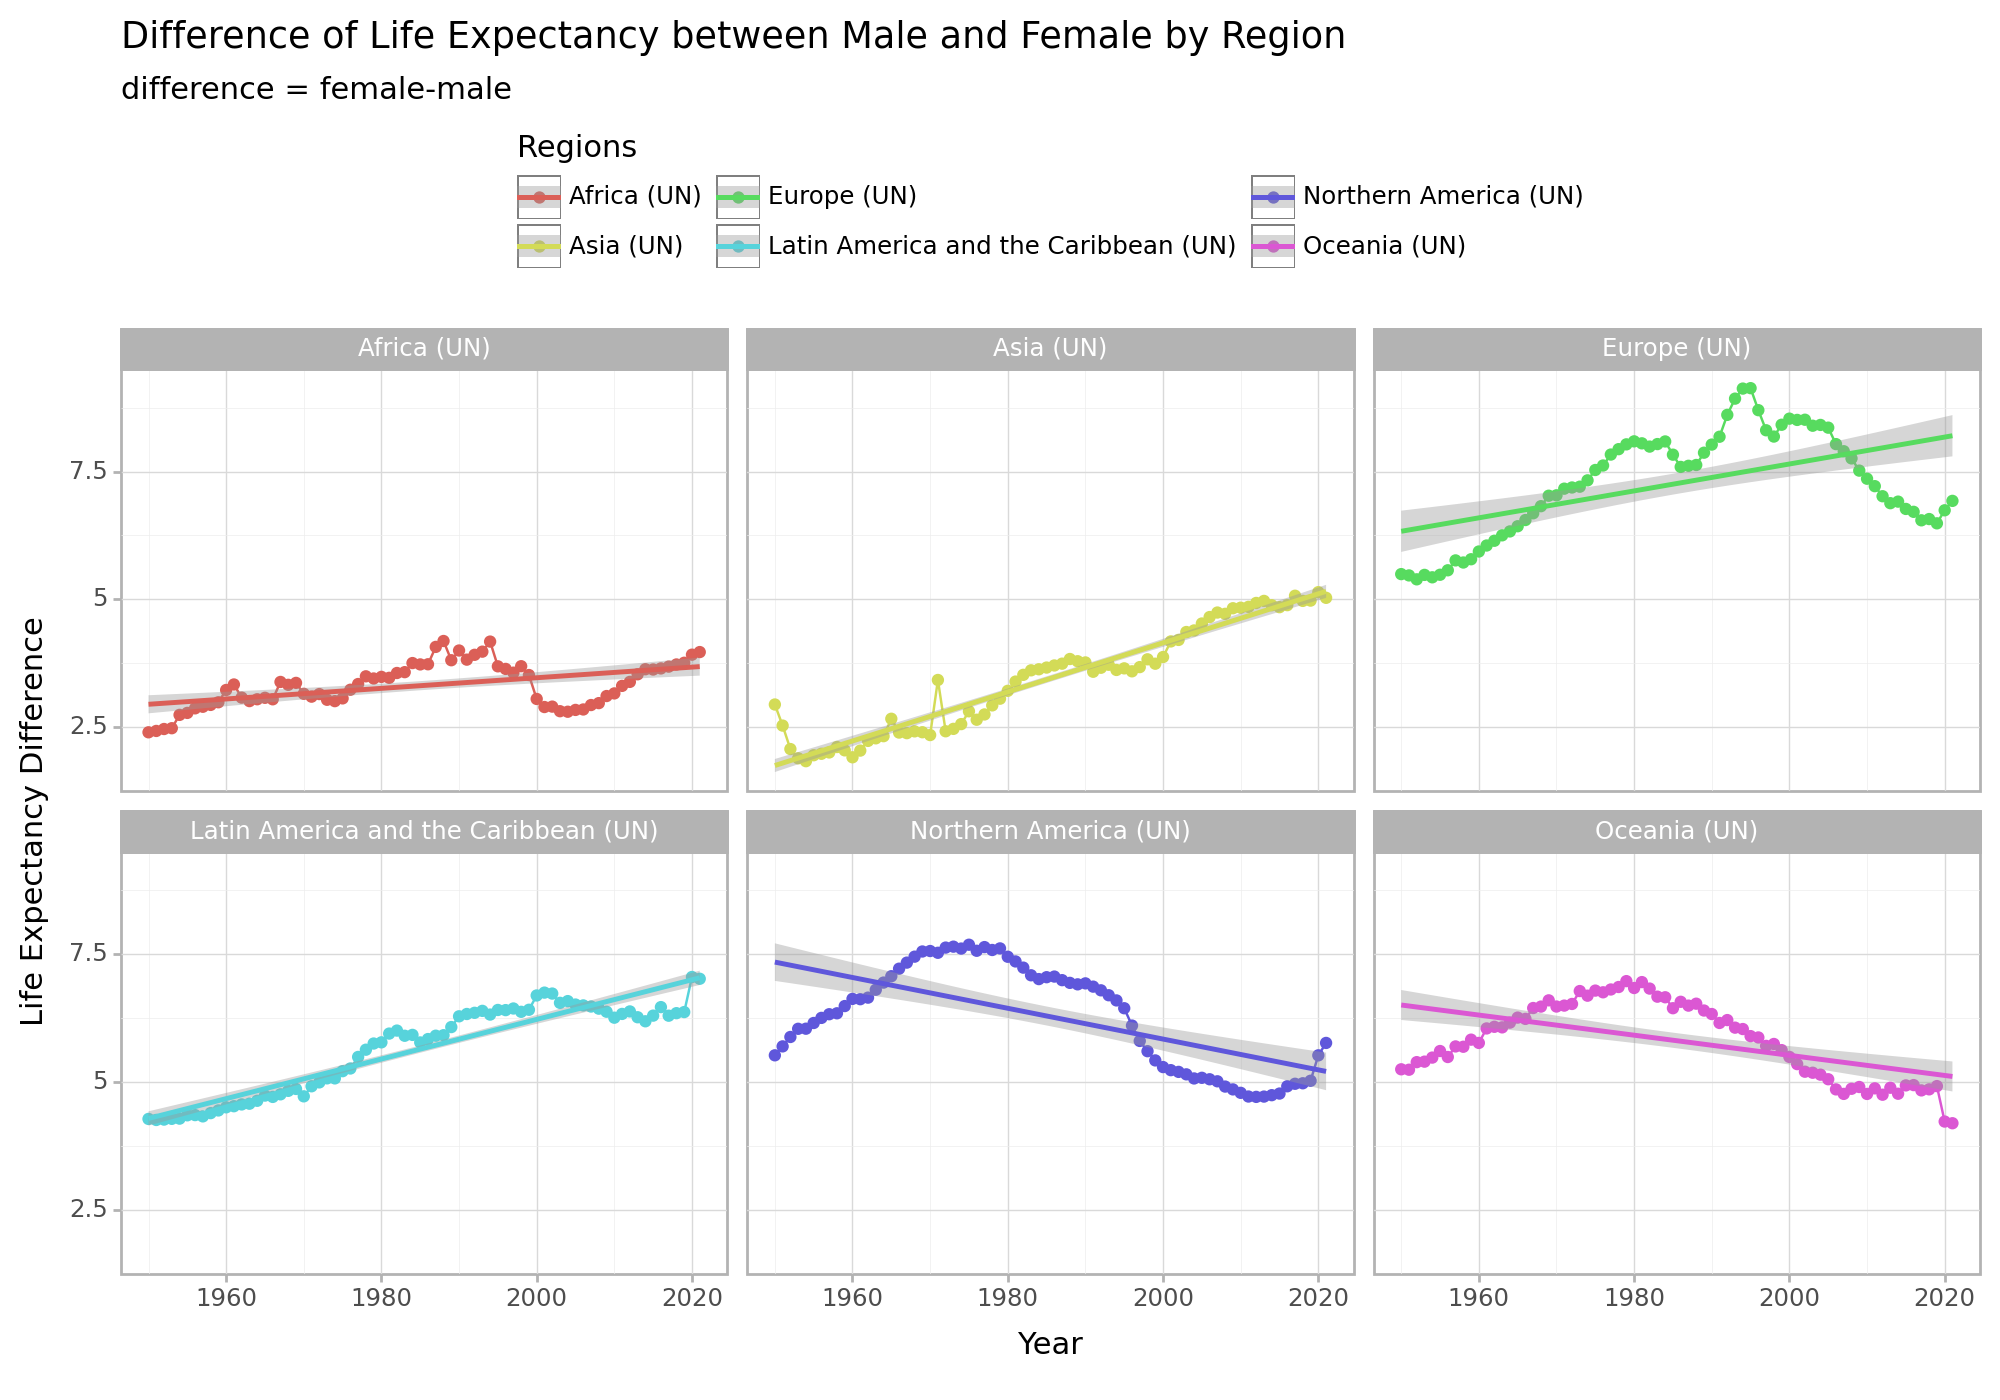

<Figure Size: (1000 x 700)>

In [48]:
un_areas = df["Ent"].loc[df["Ent"].map(lambda cell : True if "(UN)" in cell else False)]
diff_data = (df.query("Year >= 1950 and Ent in @un_areas"))
diff_data
(ggplot(diff_data, aes(x="Year", y="LEDFM", color="Ent")) +
 geom_point() +
 geom_line() +
 stat_smooth(method='lm') +
 facet_wrap("~Ent") +
 theme_light() +
 theme(legend_position="top",
       figure_size=(10,7)) +
 labs(title="Difference of Life Expectancy between Male and Female by Region",
      subtitle="difference = female-male",
      color="Regions",
      y="Life Expectancy Difference"))